In [1]:
#from google.colab import drive 
#drive.mount('/content/drive/')

In [2]:
import numpy as np 
import pandas as pd 

import warnings 
warnings.filterwarnings('ignore')

# Visualization Library 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 

# Robust Scaler
from sklearn.preprocessing import RobustScaler

# Synthetic Minority Over-sampling Technique
from imblearn.over_sampling import SMOTE 
 
# Hold-out Method 
from sklearn.model_selection import train_test_split

# Grid Search CV
from sklearn.model_selection import GridSearchCV

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Tree Model
from sklearn.tree import DecisionTreeClassifier

# Support Vector Machine 
from sklearn.svm import SVC

# Ensemble Model
from lightgbm import LGBMClassifier 
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [3]:
dataset = pd.read_csv('health care diabetes.csv')
df = dataset.copy() #Creating the copy of the dataframe 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

# Descriptive Analysis

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
class_0 = df[df.Outcome ==0] # Outcome = 0 (i.e) Non-Diabetic Patient
class_1 = df[df.Outcome ==1] # Outcome = 1 (i.e) Diabetic Patient

In [7]:
outcome_0 = round(class_0.describe(),2)
outcome_1 = round(class_1.describe(),2)

In [8]:
outcome_0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.0
mean,3.30,109.98,68.18,19.66,68.79,30.30,0.43,31.19,0.0
std,3.02,26.14,18.06,14.89,98.87,7.69,0.30,11.67,0.0
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.0
25%,1.00,93.00,62.00,0.00,0.00,25.40,0.23,23.00,0.0
50%,2.00,107.00,70.00,21.00,39.00,30.05,0.34,27.00,0.0
75%,5.00,125.00,78.00,31.00,105.00,35.30,0.56,37.00,0.0
max,13.00,197.00,122.00,60.00,744.00,57.30,2.33,81.00,0.0


# Outcome_0 Descriptive Analysis Insights

For **Pregnancies**, Mean is 3.3 and upto 75 percentile it shows 5 and Max it shows 13, it shows that the persence of outlier.

For **Insulin**, Mean is 68.79, Min and 25 percentile it is 0, @ 75 percentile it is 105, but in Max it shows 744, it shows the presence of outliers.

In [9]:
outcome_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.0
mean,4.87,141.26,70.82,22.16,100.34,35.14,0.55,37.07,1.0
std,3.74,31.94,21.49,17.68,138.69,7.26,0.37,10.97,0.0
min,0.00,0.00,0.00,0.00,0.00,0.00,0.09,21.00,1.0
25%,1.75,119.00,66.00,0.00,0.00,30.80,0.26,28.00,1.0
50%,4.00,140.00,74.00,27.00,0.00,34.25,0.45,36.00,1.0
75%,8.00,167.00,82.00,36.00,167.25,38.78,0.73,44.00,1.0
max,17.00,199.00,114.00,99.00,846.00,67.10,2.42,70.00,1.0


# Outcome_1 Descriptive Analysis Insights

For **Pregnancies**, Mean is 4.87, Median or 50 percentile is 4 counts, but Max counts 17

For **Insulin**, Mean is 100.84, 25 percentile and median/50 percentile is 0, But Max it shows 846. It shows the persence of Outliers 

# Univariate Analysis 

In [10]:
class_0 = class_0.drop('Outcome', axis=1)

Text(1, 2, 'Outcome 0 (Not Diabetic patient) Univariate Plots')

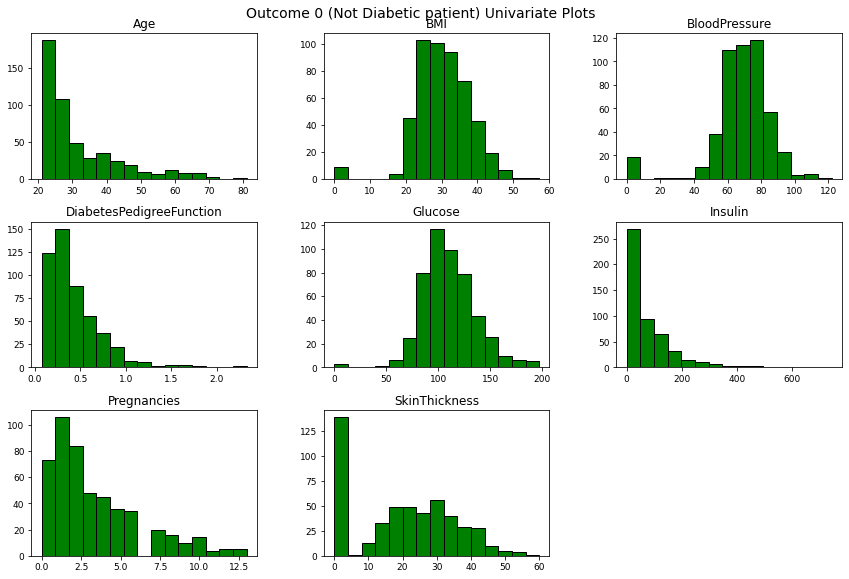

In [11]:
class_0.hist(bins=15, 
             color='green', 
             edgecolor='black', 
             linewidth=1.0,
             xlabelsize=9, 
             ylabelsize=9, 
             grid=False)    

plt.tight_layout(rect=(0, 0, 2, 2)) # it will change the size of the plot

plt.suptitle('Outcome 0 (Not Diabetic patient) Univariate Plots',
             x=1, # title x position
             y=2, # title y position
             fontsize=14) 

Here BMI, Blood Pressure, Glucose, Skin Thickness are almost Normally or Gaussian Distribution.

Here the Age, Insulin, Pregnancies, DiabetesPedigreeFunction the data is **right skewed**.

Some datas are loaded majorly on 0.

In [12]:
class_1 = class_1.drop('Outcome',axis=1)

Text(1, 2, 'Outcome 1 (Diabetic patient) Univariate Plots')

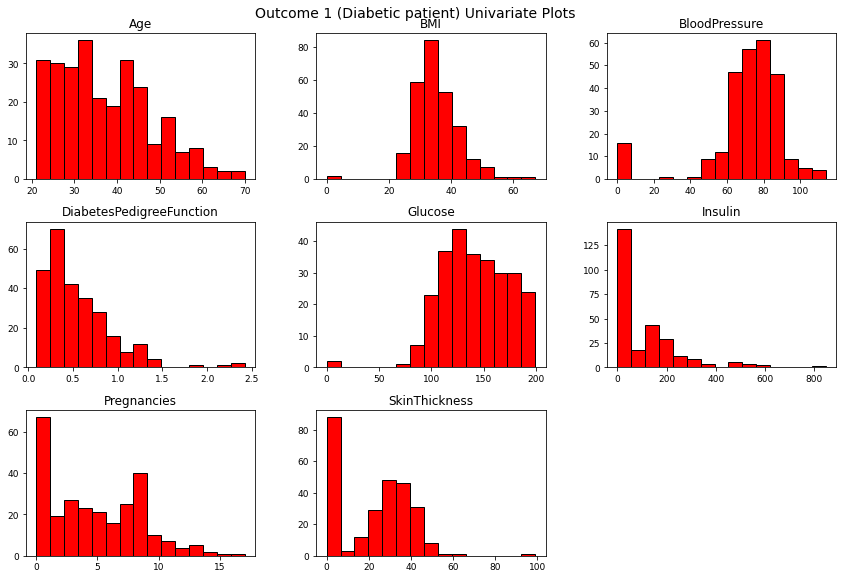

In [13]:
class_1.hist(bins=15, 
             color='red', 
             edgecolor='black', 
             linewidth=1.0,
             xlabelsize=9, 
             ylabelsize=9, 
             grid=False)    

plt.tight_layout(rect=(0, 0, 2, 2)) # it will change the size of the plot

plt.suptitle('Outcome 1 (Diabetic patient) Univariate Plots',
             x=1, # x position of title
             y=2, # y position of title
             fontsize=14) 

Here BMI, Blood Pressure, Skin Thickness are almost Normally or Gaussian Distribution.

Here the Age, Insulin, Pregnancies, DiabetesPedigreeFunction the data is **right skewed**.

Some datas are loaded majorly on 0.

In [14]:
df_box = df.drop('Outcome',axis=1)

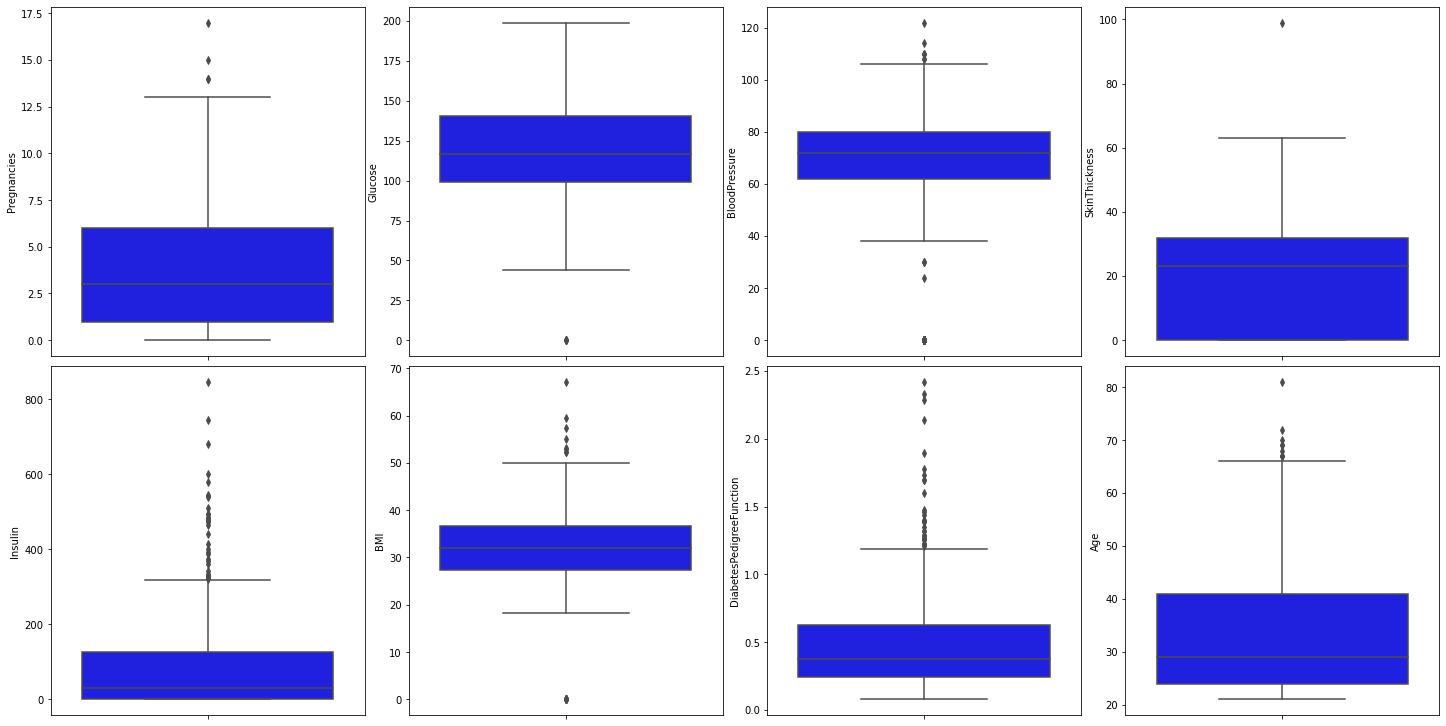

In [15]:
fig , ax = plt.subplots(nrows= 2,       # no,of plots comes in row wise 
                        ncols= 4,       # no,of plots comes in column wise 
                        figsize=(20,10) # size of plot
                        )
ax = ax.flatten() # It returns a flattened version of the array, to avoid numpy.ndarray
index = 0
for i in df_box.columns:
  sns.boxplot(y=i,data = df_box, ax=ax[index],color='blue')
  index += 1
plt.tight_layout(pad=0.4)

In Box plot, it completely shows the picture of the Outlier present in the datasets.

All the series of data column has outlier, since the shape of the data (768, 9), it shows that datasets is very small and the outliers cannot be removed.

But it should be scaled using Robust scaler because it consists of many outlier where Standard Scaler, Min max Scaler etc are sensitive to outliers 

# Multivariate Analysis

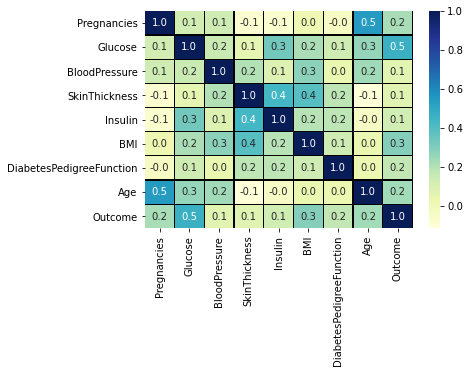

In [16]:
corr = df.corr()
sns.heatmap(corr,
            fmt='.1f',
            linewidth=0.2,
            linecolor='black',
            annot = True,
            cmap="YlGnBu"
            )

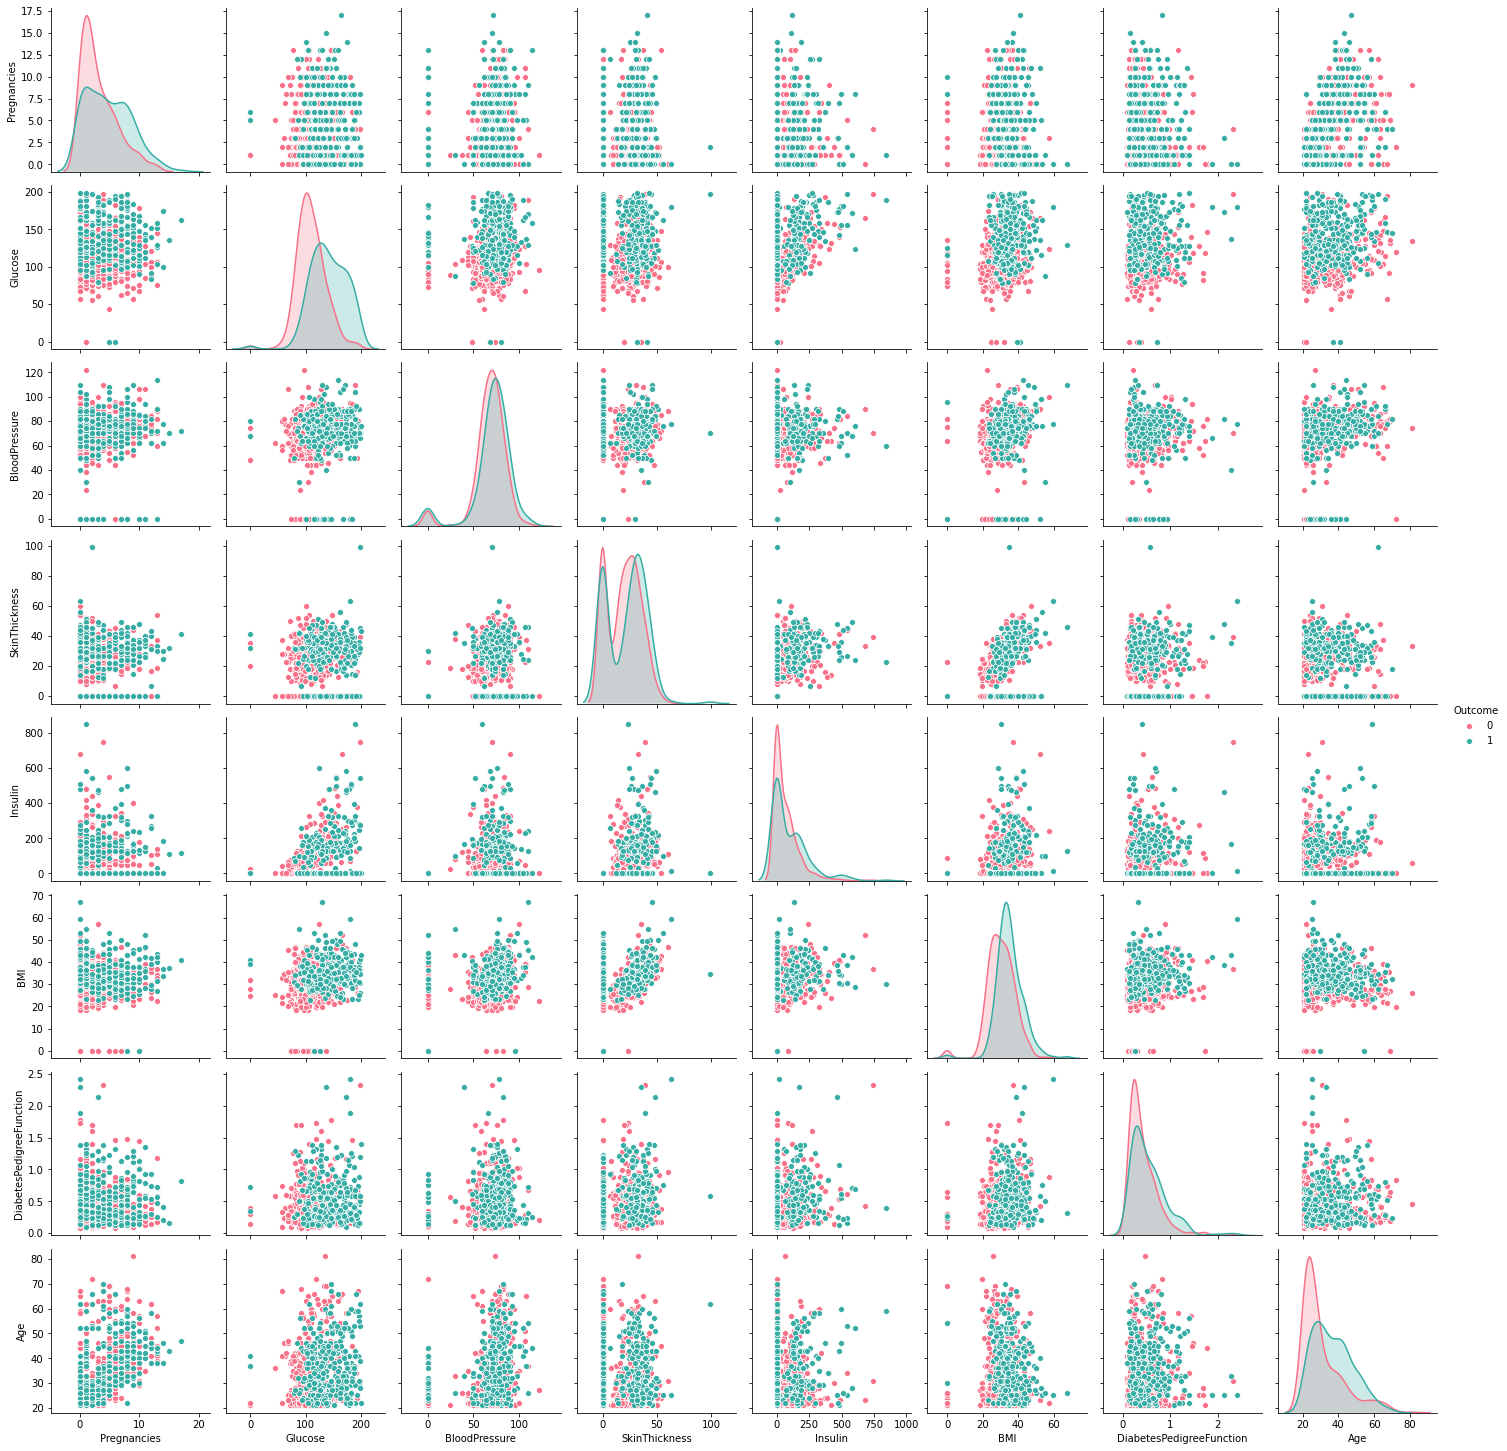

In [17]:
sns.pairplot(df,              # dataset
             hue='Outcome',   # variable in dataset to map plot aspects to different color
             palette='husl',
             )

Above plot shows the distribution of dataset in scatter plot and Kernel Density Estimator, for the different combination of datasets with respect to the Outcome.

## Bivariate Analysis

Text(0.5, 1.0, 'univariate analysis for Glucose for two classes')

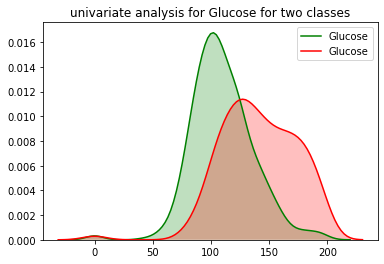

In [18]:
sns.kdeplot(class_0.Glucose, shade=True,color="g")
sns.kdeplot(class_1.Glucose, shade=True,color="r")
plt.title('univariate analysis for Glucose for two classes')

Here In this Kernel Density Estimate plot, the data of Glucose for Outcome_0 is distributed like a Normal/Gaussian distribution, with sharp peakness and most of the data points accumalted nearby the mean. 

But the curve looks abnormal because of the Outcome_1, here the datas are accumaleted in a wide pattern with some outliers at the bottom.

Text(0.5, 1.0, 'univariate analysis for Pregnancies for two classes')

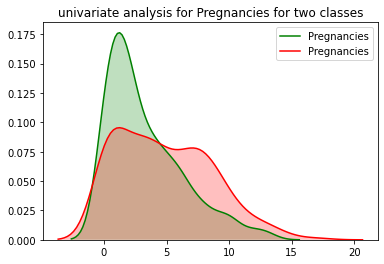

In [19]:
sns.kdeplot(class_0.Pregnancies, shade=True,color="g")
sns.kdeplot(class_1.Pregnancies, shade=True,color="r")
plt.title('univariate analysis for Pregnancies for two classes')

Here in the above 2 curves, In Outcome_0 (Green curve), the Pregnancies distribution is look like right skewed, with sharp peakness and mode is one time Pregnancy counts around 106, the median is two times pregnancy with the count of 84.

In Outcome_1 (Red curve), the Pregnancies distribution is look like abnormal distribution, data is distributed widely and mode is zero time Pregnancy counts around 38, the median is four times pregnancy with the count of 23. The right tail extended widely at end.

Text(0.5, 1.0, 'univariate analysis for BloodPressure for two classes')

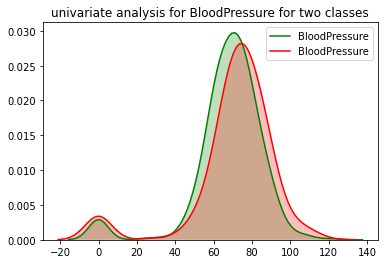

In [20]:
sns.kdeplot(class_0.BloodPressure, shade=True,color="g")
sns.kdeplot(class_1.BloodPressure, shade=True,color="r")
plt.title('univariate analysis for BloodPressure for two classes')

Here in above kDE plot, for the both the Outcome 1 & 0, except that small abnormality near zero, the rest of the data is completely shows that it is normal distributed

Text(0.5, 1.0, 'univariate analysis for SkinThickness for two classes')

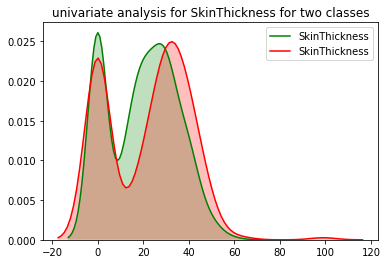

In [21]:
sns.kdeplot(class_0.SkinThickness,shade=True,color="g")
sns.kdeplot(class_1.SkinThickness, shade=True,color="r")
plt.title('univariate analysis for SkinThickness for two classes')

Here in both the curve the mode is equal to 0, for Outcome = 0 it counts upto 139 and Outcome = 1 it counts upto 88, this make the curve looks so abnormal.

The tail part of Outcome = 0, is extended quite alot. The presence of outlier will distrub the classfication while building the model i.e it will result in poor classification or overfitting.

Text(0.5, 1.0, 'univariate analysis for Insulin for two classes')

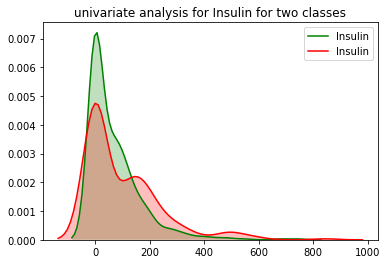

In [22]:
sns.kdeplot(class_0.Insulin,shade=True,color="g")
sns.kdeplot(class_1.Insulin, shade=True,color="r")
plt.title('univariate analysis for Insulin for two classes')

KDE plot for both the Outcome is completely  right skewed. The data distribtion of Outcome_1 is like so wavy and the right tail is extended & shows the plots of outliers.

Text(0.5, 1.0, 'univariate analysis for BMI for two classes')

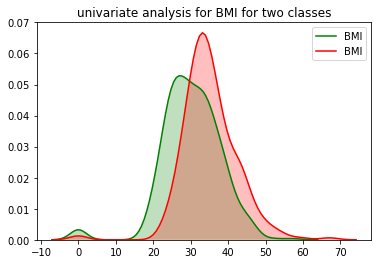

In [23]:
sns.kdeplot(class_0.BMI,shade=True,color="g")
sns.kdeplot(class_1.BMI, shade=True,color="r")
plt.title('univariate analysis for BMI for two classes')

Here, there is some accumulation of data on left side of both the curve. But the Outcome_1 is a normal distribution and it tell BMI plays one important role in Diabetes, abnormal is BMI will causes Diabetes and the right tail keep extending.

Text(0.5, 1.0, 'univariate analysis for DiabetesPedigreeFunction for two classes')

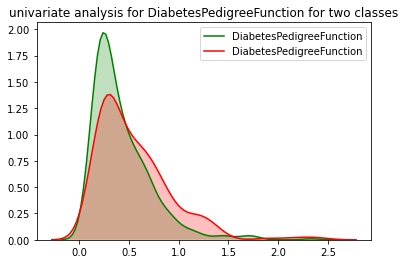

In [24]:
sns.kdeplot(class_0.DiabetesPedigreeFunction,shade=True,color="g")
sns.kdeplot(class_1.DiabetesPedigreeFunction, shade=True,color="r")
plt.title('univariate analysis for DiabetesPedigreeFunction for two classes')

Here in above curve, it shows the picture of both the outcomes were right skewed. Outcome 1, the data distribution is wide so there is abnormal in shape of Density for Outcome_1.

Text(0.5, 1.0, 'univariate analysis for Age for two classes')

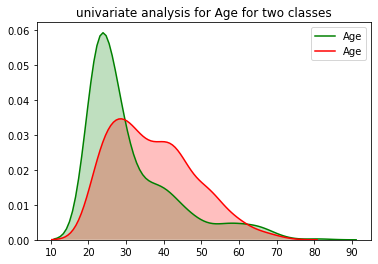

In [25]:
sns.kdeplot(class_0.Age,shade=True,color="g")
sns.kdeplot(class_1.Age, shade=True,color="r")
plt.title('univariate analysis for Age for two classes')

KDE plot for Age, outcome_0 is right skewed of mode value of 22 with the counts of 61 and median of 27 with the counts of 24. But after the age of 35 (approx) the distribution pattern is abnormal towards the right tail.

KDE plot for Age, outcome_1 the data is speard across between 25-50 yrs.

In [26]:
'''
sns.pairplot(df,               # dataset
             hue='Outcome',    # variable in dataset to map plot aspects to different color
             kind = 'reg'      # kind of chart
             )'''

"\nsns.pairplot(df,               # dataset\n             hue='Outcome',    # variable in dataset to map plot aspects to different color\n             kind = 'reg'      # kind of chart\n             )"

Here in above pair plot gives the insights of how the data distribution and relationship between the two variable in scatter plot for both the classes, how it the shows the liner regressionline for both the classes. 

It tell that the data needs to be scaled properly, by considering its outlier as well.

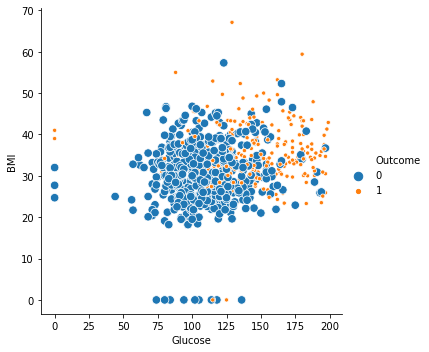

In [27]:
sns.relplot(x='Glucose',
            y='BMI',
            data = df,
            hue = 'Outcome',
            size='Outcome')

The above scatter plot tells, the people who have abnormal BMI and higher the Glucose level, will have higher the chance of getting Diabetic(orange small dots)

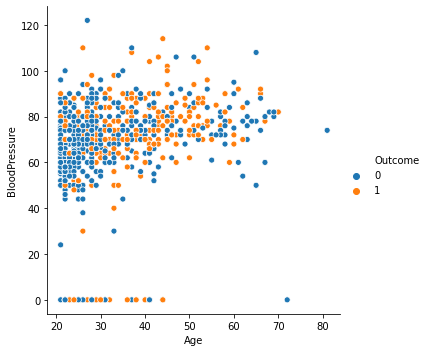

In [28]:
sns.relplot(x='Age',
            y='BloodPressure',
            data = df,
            hue = 'Outcome',)
            #size='Outcome')

Here the above plot shows that, higher the chance for people have High BloodPressure and getting Aged to be a Diabetic.

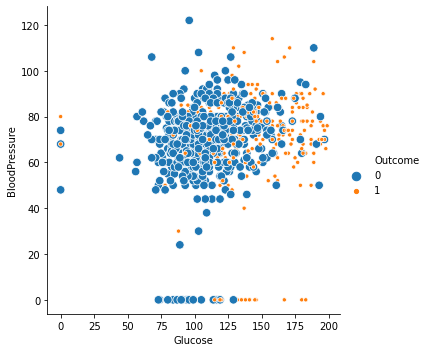

In [29]:
sns.relplot(x='Glucose',
            y='BloodPressure',
            data = df,
            hue = 'Outcome',
            size='Outcome')

Here the above plot shows that, higher the chance for people have High BloodPressure and Glucose to be a Diabetic.

# Feature Tranformation

**Binning the age to avoid the model to get distrubed by outliers.**

In [30]:
df['Age_bin']=pd.cut(x = df['Age'],                                      # Cloumn to be binned 
                        bins = [20,30,50,100],                           # Binnning sizes
                        labels = ['young_aged','middle_aged','old_aged'] # class name for Binning
                    )
df.head(9)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_bin
0,6,148,72,35,0,33.6,0.627,50,1,middle_aged
1,1,85,66,29,0,26.6,0.351,31,0,middle_aged
2,8,183,64,0,0,23.3,0.672,32,1,middle_aged
3,1,89,66,23,94,28.1,0.167,21,0,young_aged
4,0,137,40,35,168,43.1,2.288,33,1,middle_aged
5,5,116,74,0,0,25.6,0.201,30,0,young_aged
6,3,78,50,32,88,31.0,0.248,26,1,young_aged
7,10,115,0,0,0,35.3,0.134,29,0,young_aged
8,2,197,70,45,543,30.5,0.158,53,1,old_aged


In [31]:
df = df.drop('Age',axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Age_bin
0,6,148,72,35,0,33.6,0.627,1,middle_aged
1,1,85,66,29,0,26.6,0.351,0,middle_aged
2,8,183,64,0,0,23.3,0.672,1,middle_aged
3,1,89,66,23,94,28.1,0.167,0,young_aged
4,0,137,40,35,168,43.1,2.288,1,middle_aged


In [32]:
Age_bin = df.Age_bin
df.insert(0,'Aged_bin',Age_bin)
df = df.drop('Age_bin',axis=1)
df.head()

,Aged_bin,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,middle_aged,6,148,72,35,0,33.6,0.627,1
1,middle_aged,1,85,66,29,0,26.6,0.351,0
2,middle_aged,8,183,64,0,0,23.3,0.672,1
3,young_aged,1,89,66,23,94,28.1,0.167,0
4,middle_aged,0,137,40,35,168,43.1,2.288,1


### Encoding the categorical Age column

In [33]:
df.Aged_bin = df.Aged_bin.replace(to_replace = ['young_aged','middle_aged','old_aged'],value =[0,1,2],inplace=False)
df.head()

,Aged_bin,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,1,6,148,72,35,0,33.6,0.627,1
1,1,1,85,66,29,0,26.6,0.351,0
2,1,8,183,64,0,0,23.3,0.672,1
3,0,1,89,66,23,94,28.1,0.167,0
4,1,0,137,40,35,168,43.1,2.288,1


### Treating BMI Column

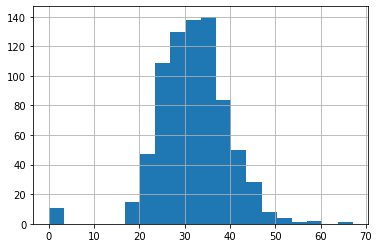

In [34]:
df.BMI.hist(bins=20)

In [35]:
df.loc[((df.Outcome == 0) &  (df.BMI ==0)) , 'BMI'] = df.loc[((df.Outcome == 0) &  (df.BMI ==0)) , 'BMI'].mean()

In [36]:
df.loc[((df.Outcome == 1) &  (df.BMI ==0)) , 'BMI'] = df.loc[((df.Outcome == 1) &  (df.BMI ==0)) , 'BMI'].mean()

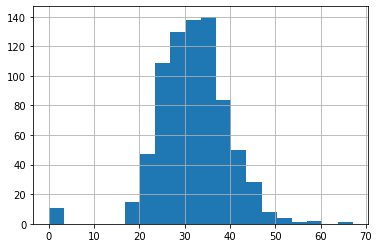

In [37]:
df.BMI.hist(bins=20)

In [38]:
class_0 = (df['Outcome'] == 0) 
class_1 = (df['Outcome'] == 1) 
avg_class_0 = df.loc[class_0, 'BMI'].mean()
avg_class_1 = df.loc[class_1, 'BMI'].mean()
df.loc[df['BMI']==0 & class_0, 'BMI'] = avg_class_0
df.loc[df['BMI']==0 & class_1, 'BMI'] = avg_class_1

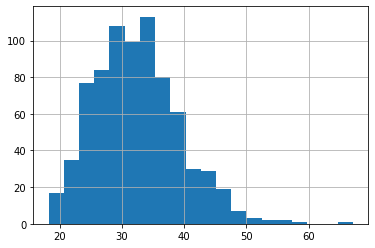

In [39]:
df.BMI.hist(bins=20)

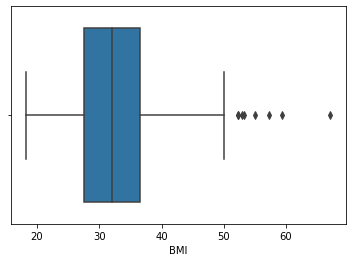

In [40]:
sns.boxplot(x=df.BMI)

**Since it has many outlier, So it is converted into a Categorical caloumn**

***Binning the BMI Column***

In [41]:
df['BMI_bin']=pd.cut(x = df['BMI'],
                        bins = [18,25,30,80], 
                        labels = ['Normal','Overweight','Obese'])
df.head(9)

,Aged_bin,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,BMI_bin
0,1,6,148,72,35,0,33.6,0.627,1,Obese
1,1,1,85,66,29,0,26.6,0.351,0,Overweight
2,1,8,183,64,0,0,23.3,0.672,1,Normal
3,0,1,89,66,23,94,28.1,0.167,0,Overweight
4,1,0,137,40,35,168,43.1,2.288,1,Obese
5,0,5,116,74,0,0,25.6,0.201,0,Overweight
6,0,3,78,50,32,88,31.0,0.248,1,Obese
7,0,10,115,0,0,0,35.3,0.134,0,Obese
8,2,2,197,70,45,543,30.5,0.158,1,Obese


In [42]:
df.BMI_bin = df.BMI_bin.replace(to_replace = ['Normal','Overweight','Obese'],value =[0,1,2],inplace=False)
df.head()

,Aged_bin,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,BMI_bin
0,1,6,148,72,35,0,33.6,0.627,1,2
1,1,1,85,66,29,0,26.6,0.351,0,1
2,1,8,183,64,0,0,23.3,0.672,1,0
3,0,1,89,66,23,94,28.1,0.167,0,1
4,1,0,137,40,35,168,43.1,2.288,1,2


In [43]:
BMI_bin = df.BMI_bin
df.insert(0,'BMI_binned',BMI_bin)

In [44]:
df = df.drop(['BMI_bin','BMI'],axis=1)
df.head()

,BMI_binned,Aged_bin,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome
0,2,1,6,148,72,35,0,0.627,1
1,1,1,1,85,66,29,0,0.351,0
2,0,1,8,183,64,0,0,0.672,1
3,1,0,1,89,66,23,94,0.167,0
4,2,1,0,137,40,35,168,2.288,1


### Treating the Insulin

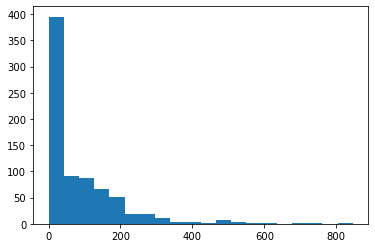

In [45]:
df.Insulin.hist(bins=20,grid=False)

In [46]:
class_0 = (df['Outcome'] == 0)
class_1 = (df['Outcome'] == 1)
avg_class_0 = df.loc[class_0,'Insulin'].median()
avg_class_1 = df.loc[class_1,'Insulin'].median()
df.loc[df['Insulin']==0 & class_0, 'Insulin'] = avg_class_0
df.loc[df['Insulin']==0 & class_1, 'Insulin'] = avg_class_1

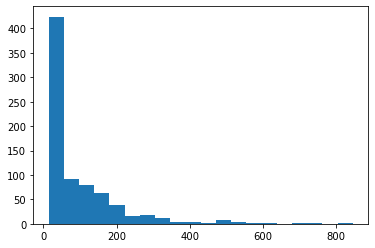

In [47]:
df.Insulin.hist(bins=20,grid=False)

Here in above plot, even after replacing the 0 with median values based on their respective class, still it looks right skewed.

### Log() Tranformation

In [48]:
df.Insulin = np.log(df.Insulin)

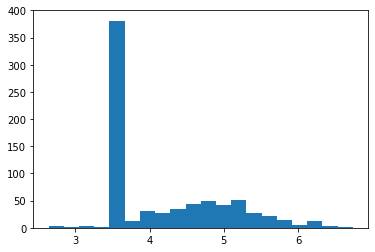

In [49]:
df.Insulin.hist(bins=20,grid=False)

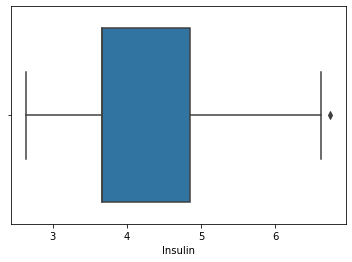

In [50]:
sns.boxplot(x=df.Insulin)

Here in above plot, once after the log() Tranformation because of previous data is right skewed and now median & IQR is changed and it shows more outliers on upper and lower bounds.

Because of persence of more Outliers in data, it is scaled with Robust Scaler

In [51]:
rs = RobustScaler(with_centering=True, 
                  with_scaling=True, 
                  quantile_range=(25.0, 75.0), 
                  copy=True)

In [52]:
df['Insulin'] = rs.fit_transform(df['Insulin'].values.reshape(-1,1))

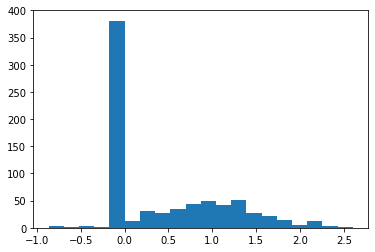

In [53]:
df.Insulin.hist(bins=20,grid=False)

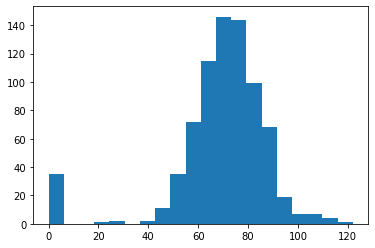

In [54]:
df.BloodPressure.hist(bins=20,grid=False)

In [55]:
avg_class_0 = df.loc[class_0,'BloodPressure'].median()
avg_class_1 = df.loc[class_1,'BloodPressure'].median()
df.loc[df['BloodPressure']==0 & class_0, 'BloodPressure'] = avg_class_0
df.loc[df['BloodPressure']==0 & class_1, 'BloodPressure'] = avg_class_1

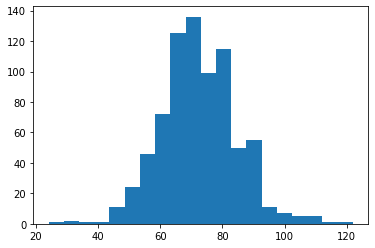

In [56]:
df.BloodPressure.hist(bins=20,grid=False)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
std_scale = StandardScaler(copy=True, 
                           with_mean=True, 
                           with_std=True)

In [59]:
df['BloodPressure'] = rs.fit_transform(df['BloodPressure'].values.reshape(-1,1))

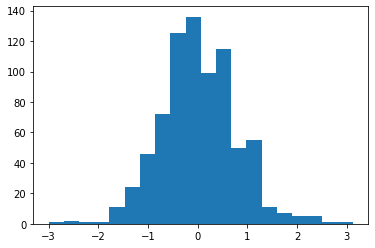

In [60]:
df.BloodPressure.hist(bins=20,grid=False)

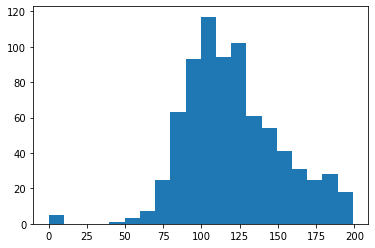

In [61]:
df.Glucose.hist(bins=20,grid=False)

In [62]:
avg_class_0 = df.loc[class_0,'Glucose'].median()
avg_class_1 = df.loc[class_1,'Glucose'].median()
df.loc[df['Glucose']==0 & class_0, 'Glucose'] = avg_class_0
df.loc[df['Glucose']==0 & class_1, 'Glucose'] = avg_class_1

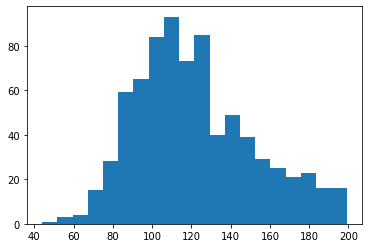

In [63]:
df.Glucose.hist(bins=20,grid=False)

In [64]:
df['Glucose'] = rs.fit_transform(df['Glucose'].values.reshape(-1,1))

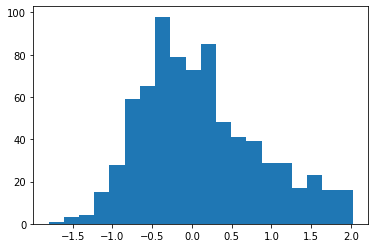

In [65]:
df.Glucose.hist(bins=20,grid=False)

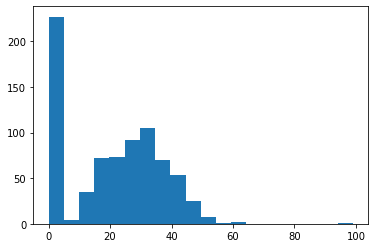

In [66]:
df.SkinThickness.hist(bins=20,grid=False)

In [67]:
avg_class_0 = df.loc[class_0,'SkinThickness'].median()
avg_class_1 = df.loc[class_1,'SkinThickness'].median()
df.loc[df['SkinThickness']==0 & class_0, 'SkinThickness'] = avg_class_0
df.loc[df['SkinThickness']==0 & class_1, 'SkinThickness'] = avg_class_1

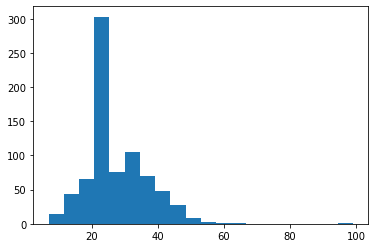

In [68]:
df.SkinThickness.hist(bins=20,grid=False)

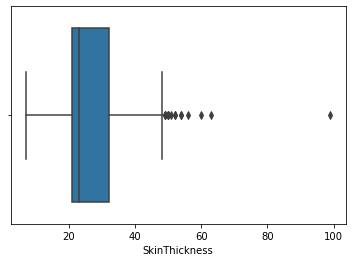

In [69]:
sns.boxplot(x=df.SkinThickness)

**Since it has more outlier, so it is treated with Robust scaler**

In [70]:
df['SkinThickness'] = rs.fit_transform(df['SkinThickness'].values.reshape(-1,1))

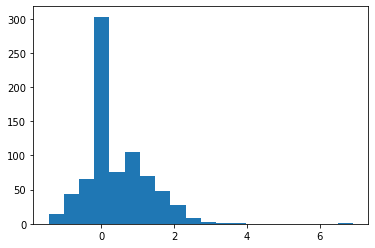

In [71]:
df.SkinThickness.hist(bins=20,grid=False)

In [72]:
df.head(9)

,BMI_binned,Aged_bin,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome
0,2,1,6,0.765432,0.000,1.090909,0.000000,0.627,1
1,1,1,1,-0.790123,-0.375,0.545455,0.000000,0.351,0
2,0,1,8,1.629630,-0.500,-0.181818,0.000000,0.672,1
3,1,0,1,-0.691358,-0.375,0.000000,0.743906,0.167,0
4,2,1,0,0.493827,-2.000,1.090909,1.234922,2.288,1
5,1,0,5,-0.024691,0.125,-0.181818,0.000000,0.201,0
6,2,0,3,-0.962963,-1.375,0.818182,0.688132,0.248,1
7,2,0,10,-0.049383,-0.125,-0.181818,0.000000,0.134,0
8,2,2,2,1.975309,-0.125,2.000000,2.226939,0.158,1


In [73]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

***Here the data is Imbalanced so it is oversampled***

## Oversampling of Data

In [74]:
smt = SMOTE(sampling_strategy='auto', random_state=9,n_jobs=-1)
x = df.drop(['Outcome'],axis = 1)
y = df.Outcome
x, y = smt.fit_sample(x,y)

## Hold-out Method 

In [75]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=9,stratify=y)

In [76]:
print('Shape of x_train',x_train.shape)
print()
print('Shape of y_train',y_train.shape)
print()
print('Shape of x_test',x_test.shape)
print()
print('Shape of y_test',y_test.shape)

Shape of x_train (800, 8)

Shape of y_train (800,)

Shape of x_test (200, 8)

Shape of y_test (200,)


## Logistic Regression

In [77]:
lr = LogisticRegression(random_state=100,
                        n_jobs=-1,
                        penalty='l2',
                        solver='liblinear'
                       )
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [78]:
print('test accuracy : ', accuracy_score(y_pred_lr,y_test))

test accuracy :  0.69


## Decision Tree Classifier with oversampling 

In [79]:
dtc = DecisionTreeClassifier(criterion="entropy",  # For the information gain
                               splitter="best",    # For the best split 
                               random_state=9
                            )

In [80]:
dtc.fit(x_train,y_train)
y_pred_dtc = dtc.predict(x_test)

In [81]:
print('test accuracy : ', accuracy_score(y_pred_dtc,y_test))

test accuracy :  0.72


## Random Forest Classifier with oversampling 

In [82]:
rfc = RandomForestClassifier(max_depth=2, 
                             random_state=0,
                             n_jobs=-1)
rfc.fit(x_train,y_train)
y_pred_rfc = dtc.predict(x_test)
print('test accuracy : ', accuracy_score(y_pred_rfc,y_test))

test accuracy :  0.72


## Without Oversampling

In [83]:
x_s = df.drop('Outcome',axis=1)
y_s = df.Outcome

In [84]:
x_train,x_test, y_train, y_test = train_test_split(x_s,y_s,test_size=0.2,random_state=9)

In [85]:
print('Shape of x_train',x_train.shape)
print()
print('Shape of y_train',y_train.shape)
print()
print('Shape of x_test',x_test.shape)
print()
print('Shape of y_test',y_test.shape)

Shape of x_train (614, 8)

Shape of y_train (614,)

Shape of x_test (154, 8)

Shape of y_test (154,)


## Decision Tree Classifier

In [86]:
dtc1 = DecisionTreeClassifier(criterion="entropy",  # For the information gain
                               splitter="best",    # For the best split 
                               random_state=9
                            )
dtc1.fit(x_train,y_train)
y_pred_dtc1 = dtc1.predict(x_test)

In [87]:
print('test accuracy : ', accuracy_score(y_pred_dtc1,y_test))

test accuracy :  0.6883116883116883


## Random Forest Classifier

In [88]:
rfc1 = RandomForestClassifier(max_depth=2, 
                             random_state=0,
                             n_jobs=-1)

In [89]:
rfc1.fit(x_train,y_train)
y_pred_rfc1 = rfc1.predict(x_test)

In [90]:
print('test accuracy : ', accuracy_score(y_pred_rfc1,y_test))

test accuracy :  0.7272727272727273


## ROC AUC curve for Random Forest Classifier

<Figure size 432x288 with 0 Axes>

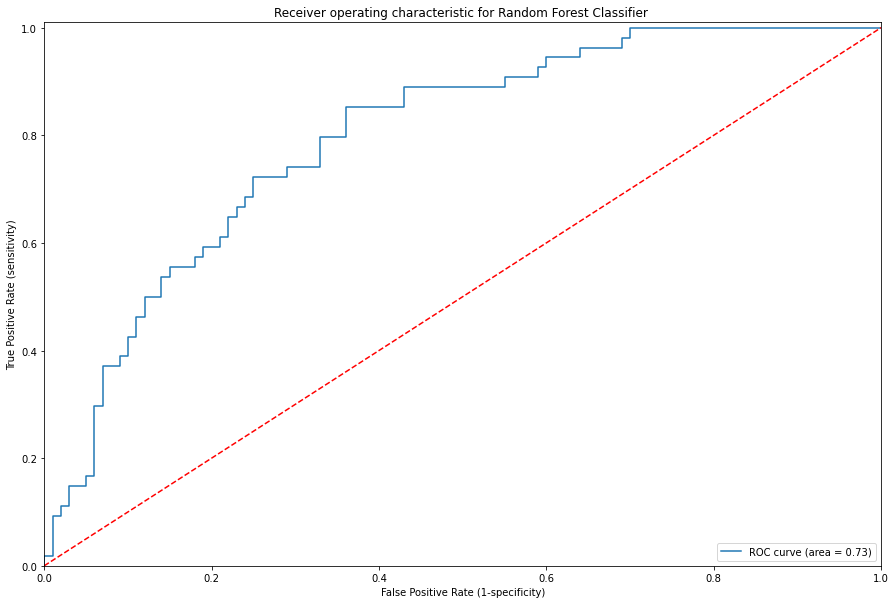

In [91]:
fpr, tpr, thershold = roc_curve(y_test, rfc1.predict_proba(x_test)[:,1])
rfc_roc = roc_auc_score(y_pred_rfc1,y_test)
plt.figure()
plt.subplots(figsize=(15,10))
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)'%rfc_roc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0,1.0])
plt.ylim([0,1.01])
plt.xlabel('False Positive Rate (1-specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.title('Receiver operating characteristic for Random Forest Classifier ')
plt.legend(loc ="lower right")
plt.show()

## SVM and GridSearchCV

In [92]:
C=np.logspace(-2,2,5)
gamma=np.logspace(-5,5,5)
kernel=['linear', 'rbf', 'sigmoid']
param_grid = dict(C=C,gamma=gamma,kernel=kernel)

In [93]:
grid = GridSearchCV(SVC(),param_grid=param_grid,n_jobs=-1)

In [94]:
grid.fit(x_train,y_train)
y_pred_grid = grid.predict(x_test)
print('Grid Search best parameter for SVC are : ',grid.best_params_)
print()
print('SVC predicted accuracy score is : ', accuracy_score (y_pred_grid,y_test))

Grid Search best parameter for SVC are :  {'C': 100.0, 'gamma': 0.0031622776601683794, 'kernel': 'rbf'}

SVC predicted accuracy score is :  0.7272727272727273


## Light GBM Classifier 

In [95]:
lgbm = LGBMClassifier(boosting_type='goss',   # Gradient-based One-Side Sampling
                      n_jobs=-1,
                      objective='binary',
                      random_state=9,
                      importance_type='split'
                      )

In [96]:
lgbm.fit(x_train, y_train)
y_pred_lgbm = lgbm.predict(x_test)
print('lgbm predicted accuracy score is : ', accuracy_score (y_pred_lgbm,y_test))

lgbm predicted accuracy score is :  0.7467532467532467


**Light GBM Classifier gives the better accuracy when compared to other models.**